In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
import statsmodels as sm
import statsmodels.formula.api as smf

In [2]:
# reading file and cleaning up the data
df = pd.read_csv('ENB2012data.csv')

In [3]:
# renamed the columns based off of info in the website provided (https://archive.ics.uci.edu/dataset/242/energy+efficiency)
df.rename(columns={'X1': 'Relative_Compactness', 
                    'X2': 'Surface_Area', 
                    'X3': 'Wall_Area', 
                    'X4': 'Roof_Area', 
                    'X5': 'Overall_Height', 
                    'X6': 'Orientation', 
                    'X7': 'Glazing_Area', 
                    'X8': 'Glazing_Area Distribution', 
                    'Y1': 'Heating_Load', 
                    'Y2': 'Cooling_Load'}, inplace=True)

In [4]:
# checking for null values in df
df.isnull().sum()

Relative_Compactness           0
Surface_Area                   0
Wall_Area                      0
Roof_Area                      0
Overall_Height                 0
Orientation                    0
Glazing_Area                   0
Glazing_Area Distribution      0
Heating_Load                   0
Cooling_Load                   0
Unnamed: 10                  765
dtype: int64

In [5]:
# the describe function provides the count, mean, standard deviation, max and min, as well as the quartiles for each column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,765.0,0.764497,0.105789,0.62,0.69,0.76,0.86,0.98
Surface_Area,765.0,671.428105,88.061549,514.50,588.00,661.50,735.00,808.50
Wall_Area,765.0,318.307843,43.531519,245.00,294.00,318.50,343.00,416.50
Roof_Area,765.0,176.560131,45.156349,110.25,147.00,147.00,220.50,220.50
Overall_Height,765.0,5.252288,1.751143,3.50,3.50,7.00,7.00,7.00
Orientation,765.0,3.499346,1.120519,2.00,2.00,3.00,5.00,5.00
Glazing_Area,765.0,0.234902,0.133215,0.00,0.10,0.25,0.40,0.40
Glazing_Area Distribution,765.0,2.813072,1.550321,0.00,2.00,3.00,4.00,5.00
Heating_Load,765.0,22.319765,10.088787,6.01,13.00,19.00,31.66,43.10
Cooling_Load,765.0,24.601412,9.511863,10.90,15.64,22.09,33.13,48.03


In [10]:
# here is the df itself
df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area Distribution,Heating_Load,Cooling_Load,Unnamed: 10
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,NaN
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,NaN
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,NaN
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,NaN
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...
760,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40,NaN
761,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88,NaN
762,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11,NaN
763,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61,NaN


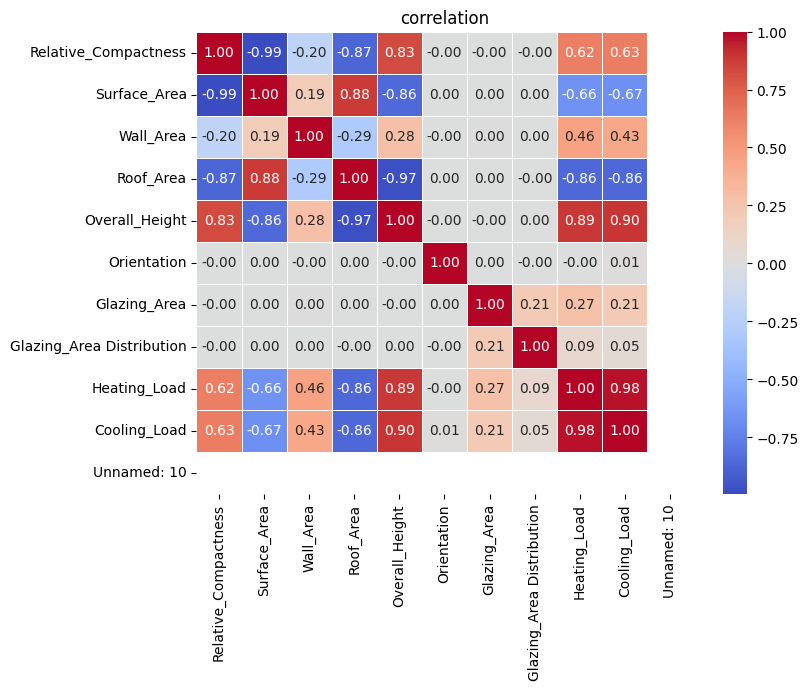

In [6]:
# with seaborn we are able to get the correlation between all of the columns in the df
# letting us know what specific columns we should use before building the model in order for it to be acurate
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('correlation')
plt.show()

## heating model using linear regression!

we use the ordinary least squares function from statsmodels. here we have the eqution that contains the main structure of our model. since Roof_Area, Overall_Height, and Surface_Area had the highest correlation, we use them in our equation to calculate heating/cooling load

In [24]:
model_heating = smf.ols('Heating_Load ~ Roof_Area + Overall_Height + Surface_Area', data=df)

# fitting model with base parameters
model_heating = model_heating.fit()

In [12]:
# here we set any additional parameters needed for the model
# specifically we set up the Rsquare and RMSE, which help us determine whether our model is accurate or not
intercept = model_heating.params[0]
slope = model_heating.params[1]
Rsquare = model_heating.rsquared
RMSE = sqrt(model_heating.mse_total)

/var/folders/81/pvcv0t6x61v5qflsybm5ljrh0000gn/T/ipykernel_24902/754946657.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model_heating.params[0]
/var/folders/81/pvcv0t6x61v5qflsybm5ljrh0000gn/T/ipykernel_24902/754946657.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model_heating.params[1]


In [14]:
# here are the actual results from the formula
print(model_heating.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1310.
Date:                Thu, 15 May 2025   Prob (F-statistic):          6.32e-300
Time:                        16:01:58   Log-Likelihood:                -2157.7
No. Observations:                 765   AIC:                             4323.
Df Residuals:                     761   BIC:                             4342.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -28.8430      4.545     -6.

In [15]:
# here we take the coefficients given from the model summary and place the numbers inside of labeled variables
heating_intercept = -28.8430
heating_coefficient_ra = -0.0747  
heating_coefficient_oh = 5.5208
heating_coefficient_sa = 0.0527

In [16]:
# using those variables we can create a formula which helps hus accurately predict the heating/cooling load with the use of the columns in the df
df['Predicted_Heating_Load'] = heating_intercept + (df['Roof_Area'] * heating_coefficient_ra) + (df['Overall_Height'] * heating_coefficient_oh) + (df['Surface_Area'] * heating_coefficient_sa)

In [17]:
# assigning a variable name to the predictive model
heating1 = model_heating.predict()

In [18]:
# printing the results from the Rsquared and RMSE
titleline = 'Heating model predictions based off correlation \n'  + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))

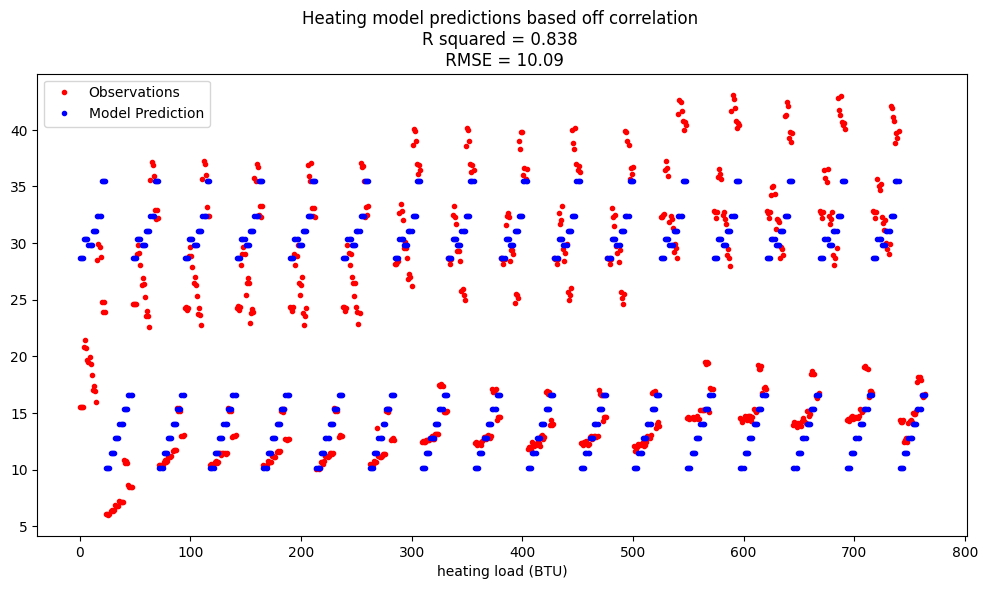

In [19]:
# plotting the actual heating load with the predicted heating load from the model
plt.figure(figsize=(12, 6))
plt.plot(df['Heating_Load'], '.', color='red')
plt.plot(df['Predicted_Heating_Load'], '.', color='blue')
plt.xlabel('heating load (BTU)')
plt.legend(['Observations','Model Prediction'])
plt.title(titleline)
plt.show()

In [20]:
# here we set up the input for the user to input roof area, overall height, and surface area in order to predict the heating/cooling load
# replace variables for user input in equation to predict
heating_input1 = int(input("roof area: "))
heating_input2 = int(input("overall height: "))
heating_input3 = int(input("surface area: "))

roof area:  31
overall height:  45
surface area:  483


In [21]:
# here we take the same formula as above and replace the columns values with the user input in order to calculate based on the input
heating_user_prediction = heating_intercept + (heating_coefficient_ra * heating_input1) + (heating_coefficient_oh * heating_input2) + (heating_coefficient_sa * heating_input3)

In [22]:
print("heating load prediction: ", heating_user_prediction, "BTU")

heating load prediction:  242.7314 BTU


## linear regression cooling model!
same as above but for the cooling

In [25]:
model_cooling = smf.ols('Cooling_Load ~ Roof_Area + Overall_Height + Surface_Area', data=df)

# fitting model with base parameters
model_cooling = model_cooling.fit()

In [26]:
intercept = model_cooling.params[0]
slope = model_cooling.params[1]
Rsquare = model_cooling.rsquared
RMSE = sqrt(model_cooling.mse_total)

/var/folders/81/pvcv0t6x61v5qflsybm5ljrh0000gn/T/ipykernel_24902/1924525828.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = model_cooling.params[0]
/var/folders/81/pvcv0t6x61v5qflsybm5ljrh0000gn/T/ipykernel_24902/1924525828.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = model_cooling.params[1]


In [27]:
# cooling summary
print(model_cooling.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1315.
Date:                Thu, 15 May 2025   Prob (F-statistic):          1.58e-300
Time:                        16:09:55   Log-Likelihood:                -2111.2
No. Observations:                 765   AIC:                             4230.
Df Residuals:                     761   BIC:                             4249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -27.7532      4.277     -6.

In [28]:
cooling_intercept = -27.7532
cooling_coefficient_ra = -0.0380  
cooling_coefficient_oh = 5.7617
cooling_coefficient_sa = 0.0429

In [30]:
df['Predicted_Cooling_Load'] = cooling_intercept + (df['Roof_Area'] * cooling_coefficient_ra) + (df['Overall_Height'] * cooling_coefficient_oh) + (df['Surface_Area'] * cooling_coefficient_sa)

In [31]:
# assigning a variable name to the predictive model
cooling1 = model_cooling.predict()

In [32]:
titleline = 'Cooling model predictions based off correlation \n'  + 'R squared = ' + str(round(Rsquare,3)) + ' \n RMSE = ' + str(round(RMSE,2))

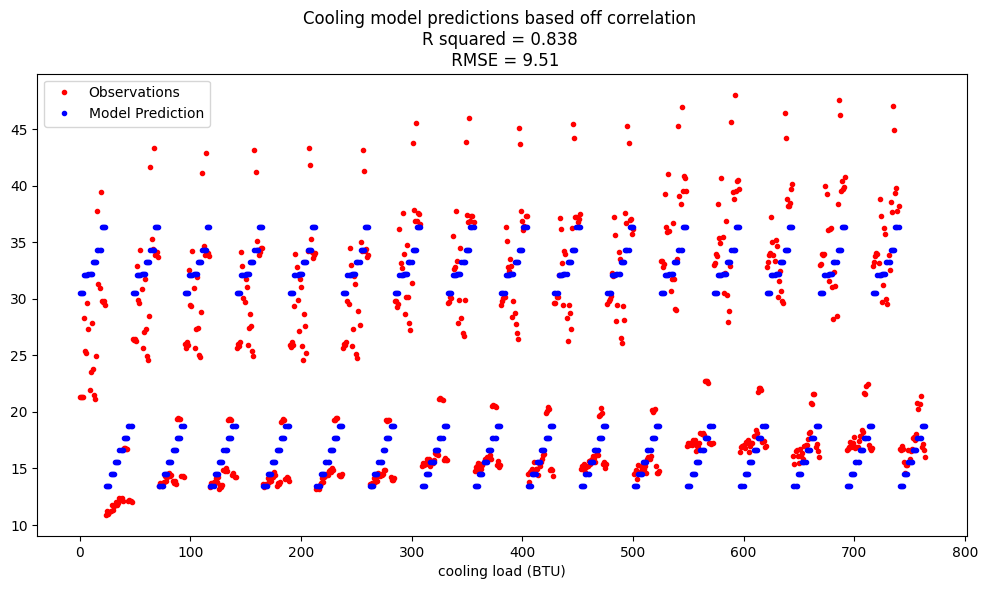

In [33]:
# plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Cooling_Load'], '.', color='red')
plt.plot(df['Predicted_Cooling_Load'], '.', color='blue')
plt.xlabel('cooling load (BTU)')
plt.legend(['Observations','Model Prediction'])
plt.title(titleline)
plt.show()

In [34]:
# replace variables for user input in equation to predict
cooling_input1 = int(input("roof area: "))
cooling_input2 = int(input("overall height: "))
cooling_input3 = int(input("surface area: "))

roof area:  34
overall height:  23
surface area:  423


In [35]:
cooling_user_prediction = cooling_intercept + (cooling_coefficient_ra * cooling_input1) + (cooling_coefficient_oh * cooling_input2) + (cooling_coefficient_sa * cooling_input3)
print("cooling load prediction: ", cooling_user_prediction, "BTU")

cooling load prediction:  121.62060000000001 BTU
